# Atlas viewer

This atlas viewer reads out the atlas information at a given MNI coordinate, from the following five atlases:
1. SPM12's **Anatomical Automatic Labeling (AAL)** atlas
2. FreeSurfer's **Desikan-Killiany** atlas (based on subject `cvs_avg35_inMNI152`)
3. FreeSurfer's **Destrieux** atlas (based on subject `cvs_avg35_inMNI152`)
4. FSL's **Harvard-Oxford** cortical and subcortical probability atlas
5. FSL's **Juelich** probability atlas

## 1. Specify a MNI coordinate

In [1]:
coord = [5.01, 0.94, 61.21]

## 2. Get Segmentation Information

In [2]:
coordStr = ','.join([str(coord[0]),str(coord[1]),str(coord[2])])
%run ../scripts/atlas_reader.py all $coordStr 0 1

Segmentation information at [5.01, 0.94, 61.21]:
aal                                 Supp_Motor_Area_R
freesurfer_desikan-killiany         ctx-rh-superiorfrontal
freesurfer_destrieux                ctx_rh_G_front_sup
HarvardOxford                   85% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
HarvardOxford                    2% Precentral_Gyrus
Juelich                         84% GM_Premotor_cortex_BA6_R


## 3. Show location in Figure

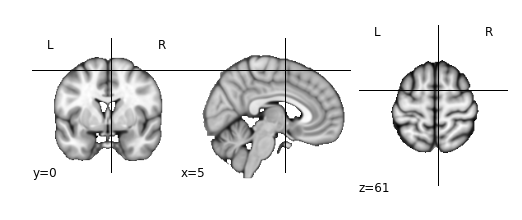

In [3]:
%matplotlib inline
from nipy.labs import viz
template = '../scripts/templates/MNI152_T1_1mm_brain.nii.gz'
anatimg = nb.load(template)
anatdata, anataff = anatimg.get_data(), anatimg.get_affine()
anatdata = anatdata.astype(np.float)
anatdata[anatdata < 10.] = np.nan
fig=viz.plot_anat(anatdata, anataff, coord, slicer='ortho')